In [15]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [9]:
def adjacency_matrix_sparse(edges, n):
    """Create sparse adjacency matrix from edges and number of nodes."""
    row = [edge[0] for edge in edges] + [edge[1] for edge in edges]
    col = [edge[1] for edge in edges] + [edge[0] for edge in edges]
    data = [1] * (2 * len(edges))
    return sparse.csr_matrix((data, (row, col)), shape=(n, n))

def degree_matrix_sparse(adj_matrix):
    """Return sparse degree matrix for the given sparse adjacency matrix."""
    degrees = np.array(adj_matrix.sum(axis=1)).flatten()
    return sparse.diags(degrees)

def laplacian_matrix_sparse(adj_matrix):
    """Calculate sparse Laplacian matrix from sparse adjacency matrix."""
    D = degree_matrix_sparse(adj_matrix)
    L = D - adj_matrix
    return L

In [10]:
edges = [(0, 1), (0, 2), (1, 2), (1, 3)]
n = 4
A = adjacency_matrix(edges, n)
L = laplacian_matrix(A)
D = degree_matrix(A)

print("Adjacency Matrix:\n", A)
print("Degree Matrix:\n", D)
print("Laplacian Matrix:\n", L)

Adjacency Matrix:
 [[0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]
Degree Matrix:
 [[2. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 1.]]
Laplacian Matrix:
 [[ 2. -1. -1.  0.]
 [-1.  3. -1. -1.]
 [-1. -1.  2.  0.]
 [ 0. -1.  0.  1.]]


Adjacency Matrix: 
- for an adjacency matrix representing an undirected graph. The matrix is symmetric about the diagonal, meaning the upper triangular part of the matrix (above the diagonal) is a mirror reflection of the lower triangular part (below the diagonal). 

	•	Nodes 0 and 1 are adjacent (as indicated by the -1 at positions (0,1) and (1,0)).
	•	Nodes 0 and 2 are adjacent.
	•	Nodes 1 and 2 are adjacent.
	•	Nodes 1 and 3 are adjacent.

Degree Matrix:

	Node 0 has a degree of 2.
	•	Node 1 has a degree of 3.
	•	Node 2 has a degree of 2.
	•	Node 3 has a degree of 1.

Laplacian Matrix:

	•	Node 0 is connected to Nodes 1 and 2 (corresponding to -1 at (0,1) and (0,2)).
	•	Node 1 is connected to Nodes 0, 2, and 3 (corresponding to -1 at (1,0), (1,2), and (1,3)).
	•	Node 2 is connected to Nodes 0 and 1 (corresponding to -1 at (2,0) and (2,1)).
	•	Node 3 is connected only to Node 1 (corresponding to -1 at (3,1)).

- we just look at the Laplacian horizontally, for example at Row 0 (Node 0), we see -1 at position 1 and 2, therefore Node 0 is connected to Node 1 and Node 2



Laplacian matrix shape: (100000, 100000)
Laplacian matrix number of non-zero elements: 1099948


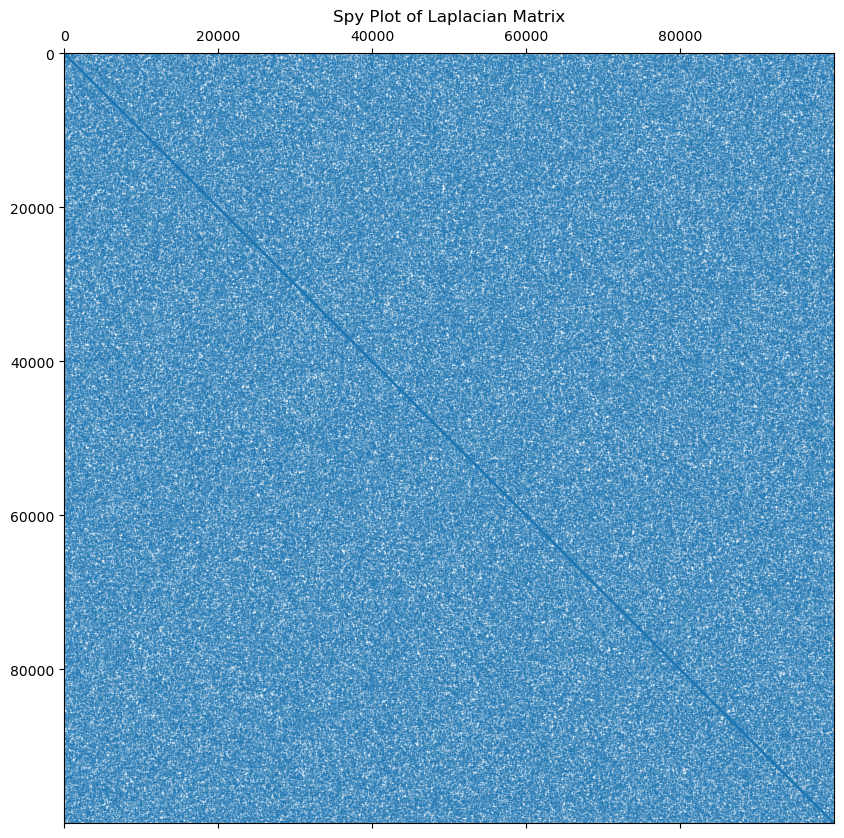

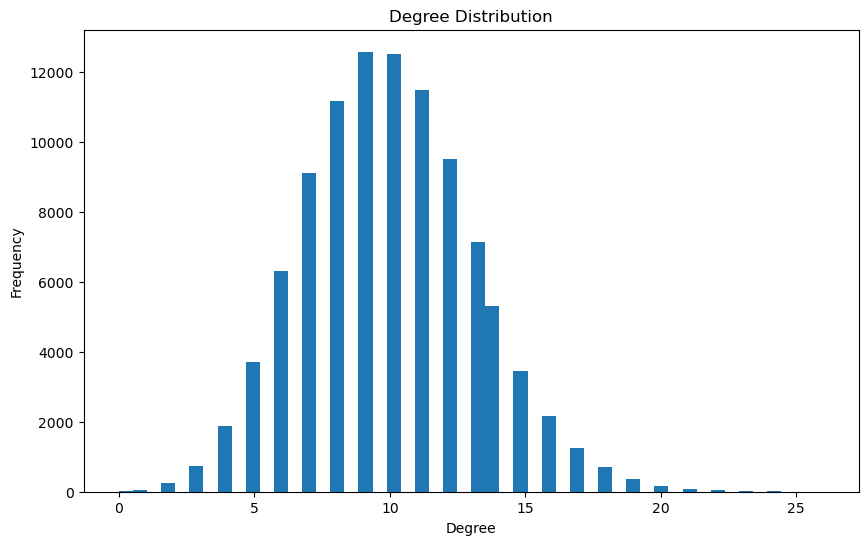

Number of edges: 999958
Mean edge weight: 1.0000
Median edge weight: 1.0000
Min edge weight: 1.0000
Max edge weight: 2.0000


In [19]:
# large graph (at least for my computer lol)
n = 100000
m = 500000

np.random.seed(42)
edges = [(np.random.randint(0, n), np.random.randint(0, n)) for _ in range(m)]
A_sparse = adjacency_matrix_sparse(edges, n)
L_sparse = laplacian_matrix_sparse(A_sparse)

print(f"Laplacian matrix shape: {L_sparse.shape}")
print(f"Laplacian matrix number of non-zero elements: {L_sparse.nnz}")
plt.figure(figsize=(10, 10))
plt.spy(L_sparse, markersize=0.1)
plt.title("Spy Plot of Laplacian Matrix")
plt.show()

degrees = L_sparse.diagonal()
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

print(f"Number of edges: {len(edge_weights)}")
print(f"Mean edge weight: {np.mean(edge_weights):.4f}")
print(f"Median edge weight: {np.median(edge_weights):.4f}")
print(f"Min edge weight: {np.min(edge_weights):.4f}")
print(f"Max edge weight: {np.max(edge_weights):.4f}")